In [1]:
import pandas as pd
import numpy as np

amazon = pd.read_csv("amazon_cells_labelled.txt", sep= "\t",names=["Review","Sentiment"])

In [2]:
amazon.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [76]:
pos = amazon[amazon["Sentiment"] == 1].count()

neg = amazon[amazon["Sentiment"] == 0].count()




In [82]:
def text_length(data):
    return len(data)

amazon["Text_length"] = amazon["Review"].apply(text_length)
amazon.head()

,Review,Sentiment,Text_length
0,So there is no way for me to plug it in here i...,0,82
1,"Good case, Excellent value.",1,27
2,Great for the jawbone.,1,22
3,Tied to charger for conversations lasting more...,0,79
4,The mic is great.,1,17


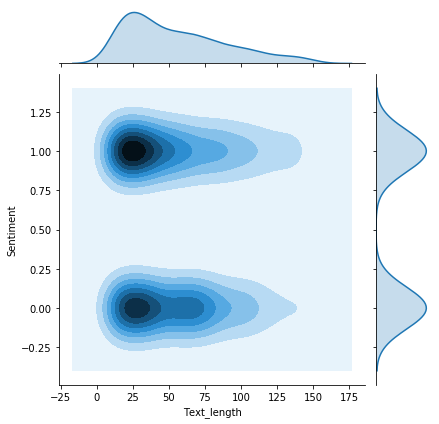

In [92]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

sb.jointplot(x= "Text_length",y="Sentiment" , data = amazon,kind = "kde")


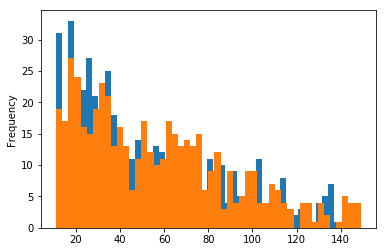

In [115]:


amazon["Text_length"][amazon["Sentiment"] == 1].plot.hist(bins = 50)


amazon["Text_length"][amazon["Sentiment"] == 0].plot.hist(bins = 50)

In [130]:
import string
def rem_punc(data):
    data = str(data)
    return data.translate(data.maketrans('','',string.punctuation))

data = "Test ! message: let's see what happens!?"

#rem_punc(data)

amazon["Review"] = amazon["Review"].apply(rem_punc)
amazon["Review"]

0      So there is no way for me to plug it in here i...
1                              Good case Excellent value
2                                  Great for the jawbone
3      Tied to charger for conversations lasting more...
4                                       The mic is great
5      I have to jiggle the plug to get it to line up...
6      If you have several dozen or several hundred c...
7                If you are Razr owneryou must have this
8                      Needless to say I wasted my money
9                         What a waste of money and time
10                        And the sound quality is great
11     He was very impressed when going from the orig...
12     If the two were seperated by a mere 5 ft I sta...
13                              Very good quality though
14     The design is very odd as the ear clip is not ...
15     Highly recommend for any one who has a blue to...
16                    I advise EVERYONE DO NOT BE FOOLED
17                             

In [175]:
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix
import warnings

warnings.filterwarnings("ignore")

vect = TfidfVectorizer(stop_words = "english")
X = vect.fit_transform(amazon["Review"])

train_x, test_x , train_y, test_y = train_test_split(X,amazon["Sentiment"], test_size = 0.2, random_state = 42)

# Naive bayes classfictaion
cls_nb = GaussianNB()
cls_nb.fit(train_x.toarray(),train_y)


print(confusion_matrix(test_y,cls_nb.predict(test_x.toarray())))
print("Accuracy score Naive Bayes:",cross_val_score(cls_nb,test_x.toarray(),test_y, cv = 10).mean())
print("############################")
# Logistic regression

cls_lr = LogisticRegression()
cls_lr.fit(train_x.toarray(),train_y)
print(confusion_matrix(test_y,cls_lr.predict(test_x.toarray())))
print("Accuracy score Logistic regression:",cross_val_score(cls_lr,test_x.toarray(),test_y, cv = 10).mean())
print("############################")

# Decsion tree 

cls_dt = DecisionTreeClassifier(random_state = 42)
cls_dt.fit(train_x.toarray(),train_y)
print(confusion_matrix(test_y,cls_dt.predict(test_x.toarray())))
print("Accuracy score Decision tree:",cross_val_score(cls_dt,test_x.toarray(),test_y, cv = 10).mean())
print("############################")

# Random Forest 

cls_rf = RandomForestClassifier(random_state = 42)
cls_rf.fit(train_x.toarray(),train_y)
print(confusion_matrix(test_y,cls_rf.predict(test_x.toarray())))
print("Accuracy score Random Forest:",cross_val_score(cls_rf,test_x.toarray(),test_y, cv = 10).mean())
print("############################")

# KNN

cls_knn = KNeighborsClassifier(n_neighbors=8)
cls_knn.fit(train_x.toarray(),train_y)
print(confusion_matrix(test_y,cls_knn.predict(test_x.toarray())))
print("Accuracy score KNN:",cross_val_score(cls_knn,test_x.toarray(),test_y, cv = 10).mean())

[[57 36]
 [26 81]]
Accuracy score Naive Bayes: 0.6897619047619047
############################
[[82 11]
 [29 78]]
Accuracy score Logistic regression: 0.7656516290726817
############################
[[79 14]
 [31 76]]
Accuracy score Decision tree: 0.735814536340852
############################
[[89  4]
 [35 72]]
Accuracy score Random Forest: 0.6854761904761906
############################
[[68 25]
 [19 88]]
Accuracy score KNN: 0.7308395989974937
